In [1]:
dataorig = pd.read_csv('./opti_test.csv', index_col='Unnamed: 0')

In [2]:
data = dataorig.iloc[:10]

In [3]:
yt = data.yt.values
yp = data.yp.values

In [4]:
probs = data.prob.values

In [5]:
weights = np.random.dirichlet(np.ones(data.shape[0]),size=1)


In [9]:
data

,prob,yt,yp
0,1.0,1.0,1
1,0.9,0.0,0
2,0.9,1.0,1
3,0.5,0.0,0
4,1.0,1.0,1
5,0.6,1.0,0
6,1.0,0.0,0
7,0.7,0.0,0
8,0.8,1.0,1
9,1.0,0.0,0


In [10]:
odds = np.random.uniform(1.7, 2.3, size=data.shape[0])
odds

array([1.93042257, 1.75296509, 1.83643244, 2.29039627, 2.26088775,
       2.13970267, 2.13381301, 2.03119291, 2.28427007, 2.11062069])

In [11]:
weights = np.random.dirichlet(np.ones(data.shape[0]),size=1)
weights

array([[0.08035452, 0.23517113, 0.02282616, 0.08890945, 0.03003227,
        0.11513641, 0.00878148, 0.1261957 , 0.09405114, 0.19854174]])

In [30]:
100*((odds*weights*out).sum() -1)

43.78567972347478

In [23]:
out = np.random.binomial(1, 0.77,size=data.shape[0])
out

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [24]:
out*odds

array([1.92869978, 2.29713012, 0.        , 2.17119078, 0.        ,
       1.85631701, 2.19401661, 2.2157313 , 0.        , 2.03142864])

In [19]:
a = odds*weights - weights

In [21]:
a.sum()

1.0439814582355833

In [13]:
ks=[]
odds = np.random.uniform(1.7, 2.3, size=data.shape[0])
out = np.random.binomial(1, 0.77,size=data.shape[0])
np.random.shuffle(out)
for i in range(100000):
    weights = np.random.dirichlet(np.ones(data.shape[0]),size=1)
    k = (weights*probs*odds*out).sum() - 1
    ks.append(k)

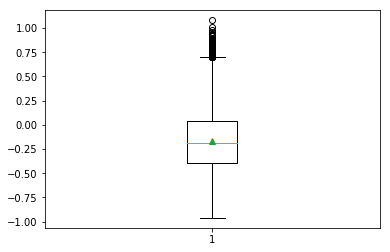

In [14]:
plt.boxplot(ks, showmeans=True);

In [205]:
"""
# Example usage
from genetic import *
target = 371
p_count = 100
i_length = 6
i_min = 0
i_max = 100
p = population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p, target),]
for i in range(100):
    p = evolve(p, target)
    fitness_history.append(grade(p, target))

for datum in fitness_history:
   print datum
"""
from random import randint, random
from operator import add

def individual(length, min, max):
    'Create a member of the population.'
    return [ randint(min,max) for x in range(length) ]

def population(count, length, min, max):
    """
    Create a number of individuals (i.e. a population).

    count: the number of individuals in the population
    length: the number of values per individual
    min: the minimum possible value in an individual's list of values
    max: the maximum possible value in an individual's list of values

    """
    return [ individual(length, min, max) for x in range(count) ]

def fitness(individual, target):
    """
    Determine the fitness of an individual. Higher is better.

    individual: the individual to evaluate
    target: the target number individuals are aiming for
    """
    sum = reduce(add, individual, 0)
    return abs(target-sum)

def grade(pop, target):
    'Find average fitness for a population.'
    summed = reduce(add, (fitness(x, target) for x in pop))
    return summed / (len(pop) * 1.0)

def evolve(pop, target, retain=0.2, random_select=0.05, mutate=0.01):
    graded = [ (fitness(x, target), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]
    # randomly add other individuals to
    # promote genetic diversity
    for individual in graded[retain_length:]:
        if random_select > random():
            parents.append(individual)
    # mutate some individuals
    for individual in parents:
        if mutate > random():
            pos_to_mutate = randint(0, len(individual)-1)
            # this mutation is not ideal, because it
            # restricts the range of possible values,
            # but the function is unaware of the min/max
            # values used to create the individuals,
            individual[pos_to_mutate] = randint(
                min(individual), max(individual))
    # crossover parents to create children
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male) / 2)
            child = male[:half] + female[half:]
            children.append(child)        
    parents.extend(children)
    return parents

In [206]:
from functools import reduce

In [211]:
target = 100
p_count = 100
i_length = 20
i_min = 0
i_max = 100
p = population(p_count, i_length, i_min, i_max)
fitness_history = [grade(p, target),]
for i in range(1000):
    p = evolve(p, target)
    fitness_history.append(grade(p, target))

for datum in fitness_history:
    print(datum)

894.51
759.11
669.59
593.55
528.07
515.4
508.2
496.88
450.94
436.0
437.04
435.38
433.54
423.29
408.72
410.45
408.52
405.0
405.0
408.28
405.0
405.0
408.15
405.0
405.0
405.0
405.0
405.0
405.0
405.38
405.0
405.0
405.0
405.0
404.52
402.84
396.72
395.04
392.52
390.84
385.47
382.56
382.2
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
382.9
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
381.0
383.46
381.0
381.0
381.0
381.0
381.6
381.0
381.0
381.0
381.0
381.0
380.96
380.87
380.73
380.08
380.0
380.0
380.0
380.0
380.0
380.0
380.0
381.56
380.0
381.02
380.0
379.96
379.88
382.29
380.02
378.06
378.35
378.28
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.08
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
378.0
377.89
377.67
377.12
374.26
369.75
367.55
367.0
367.0
367.0
367.0
367.0
367.0
367.0
367.0
365.32
359.02
335.08
327.1
325.0
325.0
325.0
325.0
325.0
325.0
325.48
325.0
328.29
325.0
325.0
325.0
325.0
325.0
325.0
3

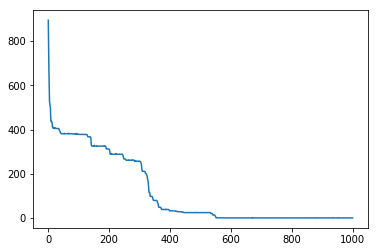

In [212]:
plt.plot(fitness_history)